In [1]:
# Team Annihilators- MehulKumar Patel,Dhiraj Patel 
# Emails: dhiru474@gmail.com,mkpatel.p64@gmail.com
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/viratkohlidataset/ViratKohli IPL 2020.csv
/kaggle/input/skillsay-ai-crickethon-dataset/matches.csv
/kaggle/input/skillsay-ai-crickethon-dataset/deliveries.csv


# Insights of IPL dataset provided by Skillsay Ai Crickethon Team

## Insights derived from dataset after synthesis and analysis of IPL data is as follows: (2008-2019)

NOTE: The insights are majorly derived considering IPL seasons from 2017 to 2019. The insights about player performance is derived considering all seasons wherever it was necessary. 
1. Rishab Pant has the highest run scoring Indian batsmen in the last 3 seasons combined. He is way ahead than Virat Kohli and Rohit Sharma as fas ar IPL is concerned in last 3 years.
2. David Warner can be described as best batsman from last 3 seasons as he has staggering average of 51 from 26 IPL mathes he played in 2017 and 2019.
3. Leg spinners have proved to be vital pick for franchises as the wicket-taking option apart from lead pacers.Leggies Rashid Khan, Imran Tahir and Yuzvendra Chahal have been in top form in last 3 years.
4. MS Dhoni has affected most number of stumpings summing 38 and 98 catches making him best wicket-keeper of IPL. Not Suresh Raina but Dinesh Karthik has the record of having most number of catches in the IPL.
5. Approximately 18% dip is observed in the runs scored just after the power-play overs. Royal Challengers Bangalore has highest run-rate in death-overs while Rajasthan royals have the least.Sunrishers Hyderabad has best run-rate in Powerplay in last 3 seasons while the champion team Mumbai Indians have the least strangely.
6. S Dhawan has scored the most runs as an opener in power-play in last 3 seasons.Narine has the highest strike rate of 191 in powerplays in last three years. S Raina has scored 2966 runs in all editions of IPL in the middle overs from over 7 to over 15. He is followed by Virat Kohli and Rohit Sharma as high run scorers in middle overs from all seasons of IPL.MS Dhoni has been the high run scorer in middle overs from last 3 editions of IPL. 
7. Krunal is highly effective in stopping the flow of runs as he has been having highest ratio of dot balls against CSK and took 6 wickets at economy of 7 in the 5 matches he has played against CSK.
8. Seam bowlers should bowl outside off(third stumps) short ball moving inline with the body of Virat Kohli.This kind of ball troubles Virat Kohli as he edges or plays the shot earlier than required which in return goes up in the air and gets him caught out.Spin bowlers can too bowl a length-bowl at third stumps moving towards the stumps. He either tries to drive or block which increases his chances of getting caught in the 30 yard ring or else LBW if he misses the shot.





In [2]:
matches=pd.read_csv('../input/skillsay-ai-crickethon-dataset/matches.csv');
deliveries=pd.read_csv('../input/skillsay-ai-crickethon-dataset/deliveries.csv');
kohli=pd.read_csv('../input/viratkohlidataset/ViratKohli IPL 2020.csv')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
from datetime import datetime
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6, 6

In [4]:
matches.tail(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
deliveries.tail(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [7]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
## Replace Delhi Daredevils with Delhi capitals as the franchise is same
matches.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)

In [9]:
#Filtered data oF last 3 seasons (2017,2018,2019) of IPL 
last3_seasons=matches[(matches['id']<=59)|(matches['id']>=7894)]
df2=deliveries[(deliveries['match_id']<=59)|(deliveries['match_id']>=7894)]

# Which batsmen has overall best batting performance in last 3 seasons from 2017 to 2019?

In [10]:
batter=df2[(df2['extra_runs']==0)]
batsmen = pd.DataFrame(batter.groupby(['batsman']).agg({'batsman_runs' : 'sum','ball' : 'count','match_id' : 'nunique'}))
batsmen['Average'] = (batsmen['batsman_runs']/batsmen['match_id']).round(2)
batsmen['Strike_Rate'] = ((batsmen['batsman_runs']/batsmen['ball'])*100).round(2)
batsmen.rename(columns = {'ball':'balls_played', 'match_id':'Total_matches'}, inplace = True)
batsmen = batsmen.sort_values(by ='batsman_runs' , ascending = False)
batsmen[batsmen['batsman_runs'] > 1000]

,batsman_runs,balls_played,Total_matches,Average,Strike_Rate
batsman,,,,,
RR Pant,1538,899,44,34.95,171.08
S Dhawan,1496,1100,46,32.52,136.00
DA Warner,1326,907,26,51.00,146.20
V Kohli,1301,951,38,34.24,136.80
SK Raina,1265,941,46,27.50,134.43
KL Rahul,1251,844,28,44.68,148.22
SS Iyer,1213,923,41,29.59,131.42
CA Lynn,1179,816,36,32.75,144.49
SV Samson,1168,808,40,29.20,144.55


Here we see that Rishab Pant has been the high runs scoring batsmen in last 3 seasons scoring flamboyant 1594 runs.
David Warner can be described the most powerful runs-scoring batsmen as he has scored 1326 runs in 26 matches at net average of 51 runs per match.

# Which bowler has overall best bowling performance in last 3 seasons from 2017 to 2019?

In [11]:
bowling=df2[df2.dismissal_kind!='run out']
bowlers = pd.DataFrame(bowling.groupby(['bowler']).agg({'match_id' : 'nunique','total_runs' : 'sum','ball' : 'count','player_dismissed':'count'}))
bowlers['Economy'] = (6*bowlers['total_runs']/bowlers['ball']).round(2)
bowlers['Strike_rate'] = (bowlers['ball']/bowlers['player_dismissed']).round(2)
bowlers.rename(columns = {'ball':'balls_bowled', 'match_id':'Total_matches','player_dismissed':'Wickets','total_runs':'Runs_conceded'}, inplace = True)
bowlers = bowlers.sort_values(by ='Wickets' , ascending = False )
bowlers[(bowlers['Wickets'] >=30)]

,Total_matches,Runs_conceded,balls_bowled,Wickets,Economy,Strike_rate
bowler,,,,,,
JJ Bumrah,46,1321,1082,56,7.33,19.32
Rashid Khan,46,1255,1101,55,6.84,20.02
Imran Tahir,35,1023,800,50,7.67,16.00
B Kumar,41,1237,973,48,7.63,20.27
UT Yadav,39,1270,874,45,8.72,19.42
JD Unadkat,38,1245,820,45,9.11,18.22
YS Chahal,41,1167,893,44,7.84,20.30
S Kaul,34,1127,789,43,8.57,18.35
AJ Tye,26,869,614,39,8.49,15.74


JJ Bumrah has been highest number of wickets in last 3 seasons combined.Rashid Khan is next with 55 scalps with better economy rate than JJ Bumrah.

# Who is the best behind the wickets?

In [12]:
## Who has affected more number of stumpings among IPL wiket-keepers?

df = deliveries[deliveries['dismissal_kind']=='stumped']
stumped=pd.DataFrame(df.groupby(['fielder']).agg({'player_dismissed' : 'count'}))
stumped.rename(columns = {'fielder':'wicket-keeper', 'player_dismissed':'Total_stumpings'}, inplace = True)
stumped = stumped.sort_values(by ='Total_stumpings' , ascending = False)
stumped[stumped['Total_stumpings']>10]

,Total_stumpings
fielder,
MS Dhoni,38
RV Uthappa,32
KD Karthik,29
WP Saha,18
PA Patel,16
AC Gilchrist,16


MS Dhoni has affected most number of 38 stumpings followed by Uthappa and Karthik.

# Who has takes maximum number of catches from all editions of IPL?

In [13]:
df = deliveries[(deliveries['dismissal_kind']=='caught')|(deliveries['dismissal_kind']=='caught and bowled')]
stumped=pd.DataFrame(df.groupby(['fielder']).agg({'player_dismissed' : 'count'}))
stumped.rename(columns = {'player_dismissed':'Total_catches'}, inplace = True)
stumped = stumped.sort_values(by ='Total_catches' , ascending = False)
stumped[stumped['Total_catches']>50]

,Total_catches
fielder,
KD Karthik,109
SK Raina,99
MS Dhoni,98
AB de Villiers,93
RV Uthappa,84
RG Sharma,82
KA Pollard,76
V Kohli,73
PA Patel,69


Karthik has taken highest number of catches that is 109 followed by Suresh Raina.

# Runs vs Over Graph

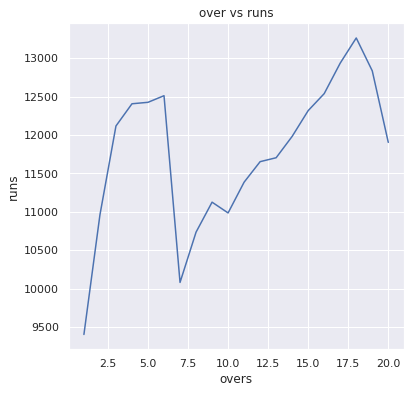

In [14]:
deliveries_sum=deliveries.groupby('over',axis=0).sum()
over=np.arange(1,21)
total_sum=deliveries_sum.total_runs
#relationship between runs and overs 
plt.plot(over,total_sum)
plt.xlabel('overs')
plt.ylabel('runs')
plt.title('over vs runs')
plt.show()


The amount of runs scored in powerplay upto 5th and death-overs from over number 16 is very high. The amount of runs is less in between 6 to 8 overs and then again increases as the game progresses.There dip of roughl 16% can be seen after the powerplay ends.(100*(12500-10200)/12500)= 18% dip

# Death-Over Analysis

In [15]:
##Best utilization of death overs by batting teams

##Here we try to find out which team have utilized the death overs best.
p_df = deliveries[ deliveries.over >= 16 ]  
def overs_played(x):
    return (len(x)//6)
    
death_overs = p_df.groupby('batting_team')['batsman_runs'].agg([overs_played, 'sum']).reset_index()
death_overs = death_overs[death_overs.overs_played>500]   
death_overs['run-rate'] =(death_overs['sum'] /death_overs['overs_played'])  
death_overs = death_overs.sort_values(by='run-rate', ascending=False).reset_index(drop=True)  
death_overs = death_overs[['batting_team','overs_played','run-rate']]
death_overs


,batting_team,overs_played,run-rate
0,Royal Challengers Bangalore,776,9.640464
1,Chennai Super Kings,768,9.414062
2,Mumbai Indians,879,9.258248
3,Kolkata Knight Riders,758,8.970976
4,Delhi Daredevils,676,8.894970
5,Kings XI Punjab,793,8.737705
6,Rajasthan Royals,639,8.555556


Royal Challengers Bangalore has highest run-rate in death-overs while Rajasthan royals have the least.

In [16]:
### Power-Hitter in last 3 seasons of IPL in death overs.

df2=deliveries[(deliveries['match_id']<=59)|(deliveries['match_id']>=7894)]
death_df = df2[(df2.over >= 16) & (df2.extra_runs ==0)] 
def balls_faced(x):
    return len(x)

temp_df = death_df.groupby('batsman')['batsman_runs'].agg([balls_faced,'sum']).reset_index() 
temp_df = temp_df[(temp_df.balls_faced>50)]   
temp_df['strike_rate_in_death_overs'] = (((temp_df['sum'] / temp_df['balls_faced'])*100)).round(2) 
temp_df.rename(columns = {'sum':'Total_runs'}, inplace = True)
temp_df = temp_df.sort_values(by='strike_rate_in_death_overs', ascending=False).reset_index(drop=True)  
temp_df = temp_df[['batsman','balls_faced','Total_runs','strike_rate_in_death_overs']]
temp_df[(temp_df.strike_rate_in_death_overs>120)]

,batsman,balls_faced,Total_runs,strike_rate_in_death_overs
0,AB de Villiers,95,260,273.68
1,RR Pant,184,435,236.41
2,SV Samson,92,216,234.78
3,AD Russell,233,531,227.90
4,K Gowtham,52,106,203.85
5,KL Rahul,121,244,201.65
6,N Rana,86,172,200.00
7,DA Warner,78,149,191.03
8,Rashid Khan,52,98,188.46
9,SR Watson,59,110,186.44


AB de villiers is the batsman with high strike rate in death overs in last 3 seasons followed by Pant and Samson.

In [17]:
### Power-Hitter in death overs in all editions of IPL .

death_df = deliveries[(deliveries.over >= 16) & (deliveries.extra_runs ==0)] 
def balls_faced(x):
    return len(x)

temp_df = death_df.groupby('batsman')['batsman_runs'].agg([balls_faced,'sum']).reset_index() 
temp_df = temp_df[(temp_df.balls_faced>50)]   
temp_df['strike_rate_in_death_overs'] = (((temp_df['sum'] / temp_df['balls_faced'])*100)).round(2) 
temp_df.rename(columns = {'sum':'Total_runs'}, inplace = True)
temp_df = temp_df.sort_values(by='strike_rate_in_death_overs', ascending=False).reset_index(drop=True)  
temp_df = temp_df[['batsman','balls_faced','Total_runs','strike_rate_in_death_overs']]
temp_df[(temp_df.strike_rate_in_death_overs>180)]

,batsman,balls_faced,Total_runs,strike_rate_in_death_overs
0,AB de Villiers,602,1379,229.07
1,RR Pant,203,464,228.57
2,CH Gayle,218,467,214.22
3,AD Russell,388,818,210.82
4,MA Agarwal,60,125,208.33
5,CR Brathwaite,75,156,208.00
6,K Gowtham,52,106,203.85
7,N Rana,93,186,200.00
8,MEK Hussey,132,261,197.73
9,SV Samson,206,405,196.60


### Power-play Analysis

In [18]:
##Best utilization of powerplay by batting teams
p_df = deliveries[ deliveries.over <= 6 ]  
def overs_played(x):
    return (len(x)//6)
    
powerplay = p_df.groupby('batting_team')['batsman_runs'].agg([overs_played, 'sum']).reset_index()
powerplay = powerplay[powerplay.overs_played>500]   
powerplay['run-rate'] =(powerplay['sum'] /powerplay['overs_played'])  
powerplay = powerplay.sort_values(by='run-rate', ascending=False).reset_index(drop=True)  
powerplay = powerplay[['batting_team','overs_played','run-rate']]
powerplay

,batting_team,overs_played,run-rate
0,Sunrisers Hyderabad,673,7.312036
1,Kings XI Punjab,1100,7.117273
2,Kolkata Knight Riders,1116,6.981183
3,Chennai Super Kings,1020,6.947059
4,Delhi Daredevils,1004,6.899402
5,Royal Challengers Bangalore,1116,6.879032
6,Rajasthan Royals,906,6.866446
7,Mumbai Indians,1178,6.689304


Sunrishers Hyderabad has best run scoring ability in Powerplay while the 3 champion team Mumbai Indians have the least strangely.

In [19]:
### Power-Hitter in last 3 seasons of IPL in powerplay overs.

df2=deliveries[(deliveries['match_id']<=59)|(deliveries['match_id']>=7894)]
death_df = df2[(df2.over <= 6) & (df2.extra_runs ==0)] 
def balls_faced(x):
    return len(x)

temp_df = death_df.groupby('batsman')['batsman_runs'].agg([balls_faced,'sum']).reset_index() 
temp_df = temp_df[(temp_df.balls_faced>40)]   
temp_df['strike_rate_in_powerplay_overs'] = (((temp_df['sum'] / temp_df['balls_faced'])*100)).round(2) 
temp_df.rename(columns = {'sum':'Total_runs'}, inplace = True)
temp_df = temp_df.sort_values(by='Total_runs', ascending=False).reset_index(drop=True)  
temp_df = temp_df[['batsman','balls_faced','Total_runs','strike_rate_in_powerplay_overs']]
temp_df[(temp_df.strike_rate_in_powerplay_overs>120)]

,batsman,balls_faced,Total_runs,strike_rate_in_powerplay_overs
0,S Dhawan,624,849,136.06
1,CA Lynn,486,728,149.79
2,AM Rahane,555,715,128.83
3,PA Patel,454,691,152.20
4,V Kohli,467,637,136.40
5,DA Warner,431,625,145.01
6,SP Narine,325,621,191.08
7,JC Buttler,363,612,168.60
8,KL Rahul,420,596,141.90
9,CH Gayle,439,590,134.40


In [20]:
### Power-Hitter in power-play overs in all editions of IPL .

death_df = deliveries[(deliveries.over <= 6) & (deliveries.extra_runs ==0)] 
def balls_faced(x):
    return len(x)

temp_df = death_df.groupby('batsman')['batsman_runs'].agg([balls_faced,'sum']).reset_index() 
temp_df = temp_df[(temp_df.balls_faced>50)]   
temp_df['strike_rate_in_powerplay_overs'] = (((temp_df['sum'] / temp_df['balls_faced'])*100)).round(2) 
temp_df.rename(columns = {'sum':'Total_runs'}, inplace = True)
temp_df = temp_df.sort_values(by='strike_rate_in_powerplay_overs', ascending=False).reset_index(drop=True)  
temp_df = temp_df[['batsman','balls_faced','Total_runs','strike_rate_in_powerplay_overs']]
temp_df[(temp_df.strike_rate_in_powerplay_overs>130)]

,batsman,balls_faced,Total_runs,strike_rate_in_powerplay_overs
0,SP Narine,325,621,191.08
1,JC Buttler,386,628,162.69
2,J Bairstow,127,198,155.91
3,MJ Lumb,145,225,155.17
4,RA Tripathi,265,410,154.72
5,YK Pathan,237,360,151.90
6,V Sehwag,1062,1586,149.34
7,CA Lynn,516,760,147.29
8,C Munro,89,131,147.19
9,UT Khawaja,73,107,146.58


## Runs-scorer in middle overs.

In [21]:
## In all editions of IPL.
death_df = deliveries[(deliveries.over > 6) & (deliveries.over < 16) & (deliveries.extra_runs ==0)] 
def balls_faced(x):
    return len(x)

temp_df = death_df.groupby('batsman')['batsman_runs'].agg([balls_faced,'sum']).reset_index() 
temp_df = temp_df[(temp_df.balls_faced>50)]   
temp_df['strike_rate_in_middle_overs'] = (((temp_df['sum'] / temp_df['balls_faced'])*100)).round(2) 
temp_df.rename(columns = {'sum':'Total_runs'}, inplace = True)
temp_df = temp_df.sort_values(by='Total_runs', ascending=False).reset_index(drop=True)  
temp_df = temp_df[['batsman','balls_faced','Total_runs','strike_rate_in_middle_overs']]
temp_df[(temp_df.Total_runs>1000)]

,batsman,balls_faced,Total_runs,strike_rate_in_middle_overs
0,SK Raina,2225,2966,133.30
1,V Kohli,2061,2606,126.44
2,RG Sharma,2061,2469,119.80
3,AB de Villiers,1691,2311,136.66
4,KD Karthik,1764,2213,125.45
5,RV Uthappa,1628,2135,131.14
6,DA Warner,1357,1883,138.76
7,SR Watson,1197,1858,155.22
8,S Dhawan,1403,1761,125.52
9,CH Gayle,1047,1758,167.91


In [22]:
## In last 3 seasons of IPL
df2=deliveries[(deliveries['match_id']<=59)|(deliveries['match_id']>=7894)]
death_df = df2[(df2.over > 6) & (df2.over > 16) & (df2.extra_runs ==0)] 
def balls_faced(x):
    return len(x)

temp_df = death_df.groupby('batsman')['batsman_runs'].agg([balls_faced,'sum']).reset_index() 
temp_df = temp_df[(temp_df.balls_faced>50)]   
temp_df['strike_rate_in_middle_overs'] = (((temp_df['sum'] / temp_df['balls_faced'])*100)).round(2) 
temp_df.rename(columns = {'sum':'Total_runs'}, inplace = True)
temp_df = temp_df.sort_values(by='Total_runs', ascending=False).reset_index(drop=True)  
temp_df = temp_df[['batsman','balls_faced','Total_runs','strike_rate_in_middle_overs']]
temp_df[(temp_df.Total_runs>100)]

,batsman,balls_faced,Total_runs,strike_rate_in_middle_overs
0,MS Dhoni,318,617,194.03
1,HH Pandya,283,537,189.75
2,AD Russell,185,457,247.03
3,KD Karthik,204,395,193.63
4,RR Pant,123,302,245.53
5,KA Pollard,166,272,163.86
6,KH Pandya,136,242,177.94
7,MK Pandey,152,238,156.58
8,Mandeep Singh,135,235,174.07
9,V Shankar,119,216,181.51


# MI bowling analysis against CSK.

In [23]:
## cskmi dataframe
cskmi=deliveries[np.logical_or(np.logical_and(deliveries['batting_team'] == 'Mumbai Indians',deliveries['bowling_team']== 'Chennai Super Kings'),np.logical_and(deliveries['bowling_team']=='Mumbai Indians',deliveries['batting_team']=='Chennai Super Kings'))]
cskmi.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15486,67,1,Chennai Super Kings,Mumbai Indians,1,1,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
15487,67,1,Chennai Super Kings,Mumbai Indians,1,2,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15488,67,1,Chennai Super Kings,Mumbai Indians,1,3,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [24]:
# Previous 2 season's records of deliveries dataset (filtered with the help of match_id)
cskmi_2season = cskmi[cskmi['match_id'] >= 7894]
cskmi_2season.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150460,7894,1,Mumbai Indians,Chennai Super Kings,1,1,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150461,7894,1,Mumbai Indians,Chennai Super Kings,1,2,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150462,7894,1,Mumbai Indians,Chennai Super Kings,1,3,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [25]:
## Creating a function and then calling the same function by player name for dotballs ratio
def dotballs(bowler_name):
 df_bowler = cskmi_2season[cskmi_2season.bowler == bowler_name]
 total_dot = df_bowler[df_bowler['total_runs'] == 0]
 dots_bowler = total_dot['total_runs'].count()
 total_balls=df_bowler['ball'].count() - df_bowler[df_bowler.wide_runs >= 1].count() - df_bowler[df_bowler.noball_runs >= 1].count()
 total_balls_df = total_balls['ball']   
 print('Dot ball ratio of :',bowler_name)
 print((dots_bowler/total_balls_df).round(3)*100)

In [26]:
## Lets look for bowlers that bowled in 2020
dotballs('RD Chahar')
dotballs('JJ Bumrah')
dotballs('HH Pandya')
dotballs('KH Pandya')

Dot ball ratio of : RD Chahar
45.2
Dot ball ratio of : JJ Bumrah
43.5
Dot ball ratio of : HH Pandya
43.1
Dot ball ratio of : KH Pandya
49.0


In [27]:
## For boult dot ball ratio
csk = deliveries[deliveries.batting_team == 'Chennai Super Kings']
boult_against_csk = csk[csk.bowler == 'TA Boult']
dotballs = boult_against_csk[boult_against_csk['total_runs'] == 0].count()
final_dotballs = dotballs['total_runs']
total_balls = boult_against_csk['ball'].count() - boult_against_csk[boult_against_csk.wide_runs >= 1].count() - boult_against_csk[boult_against_csk.noball_runs >= 1].count()
dfx = (final_dotballs/total_balls)*100
print("Boult dot balls ratio against csk in % =",dfx['ball'].round())

Boult dot balls ratio against csk in % = 41.0


In [28]:
bowl=cskmi_2season[(cskmi_2season.dismissal_kind!='run out') & (cskmi_2season.bowling_team=='Mumbai Indians') ]
bowlers = pd.DataFrame(bowl.groupby(['bowler']).agg({'match_id' : 'nunique','total_runs' : 'sum','ball' : 'count','player_dismissed':'count'}))
bowlers['Economy'] = (6*bowlers['total_runs']/bowlers['ball']).round(2)
bowlers.rename(columns = {'ball':'balls_bowled', 'match_id':'Total_matches','player_dismissed':'Wickets','total_runs':'Runs_conceded'}, inplace = True)
bowlers = bowlers.sort_values(by ='Wickets' , ascending = False )
bowlers[bowlers.Economy<=10]

,Total_matches,Runs_conceded,balls_bowled,Wickets,Economy
bowler,,,,,
HH Pandya,6,137,108,8,7.61
SL Malinga,4,151,91,8,9.96
KH Pandya,5,116,99,6,7.03
JJ Bumrah,6,165,143,5,6.92
M Markande,2,58,43,3,8.09
MJ McClenaghan,3,97,75,3,7.76
RD Chahar,4,61,85,3,4.31
J Behrendorff,1,25,25,2,6.00
A Roy,1,14,15,1,5.60


Krunal is highly effective in stopping the flow of runs as he has been having highest ratio of dot balls against CSK and took 6 wickets at economy of 7 in the 5 matches he has played against CSK.
Similar type of Bowling analysis can be performed for sets of different teams as well to dtermine the best bowling strategy against a particular team.

# Virat Kohli's dismissal insights

In [29]:
wicket=deliveries[deliveries['player_dismissed']=='V Kohli']['dismissal_kind'].value_counts()
wicket

caught               95
bowled               30
lbw                   7
run out               6
stumped               3
caught and bowled     2
Name: dismissal_kind, dtype: int64

In [30]:
wicket=(deliveries[deliveries['player_dismissed']=='V Kohli']['bowler'].value_counts())
wicket

A Nehra           6
Sandeep Sharma    5
DS Kulkarni       4
MJ McClenaghan    4
Mohammed Shami    3
                 ..
P Suyal           1
AD Mathews        1
AN Ahmed          1
PV Tambe          1
R Vinay Kumar     1
Name: bowler, Length: 91, dtype: int64

In [31]:
bowler_type=kohli.groupby(['Bowler_type']).size().reset_index(name='Bowler_count')
bowler_type=bowler_type.sort_values("Bowler_count",ascending=False)
bowler_type.groupby("Bowler_type").head(2)

,Bowler_type,Bowler_count
0,Seam,6
1,Spin,1


# Virat Kohli in IPL 2020.

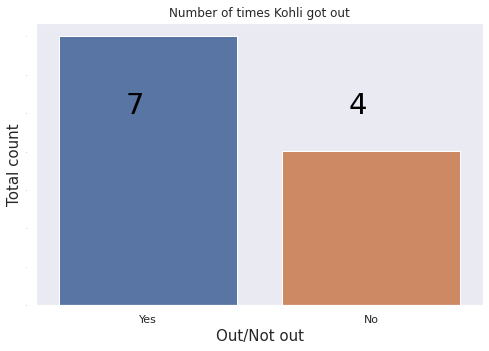

In [32]:
kohli.Out.replace({'yes' : 'Yes'},regex=True,inplace=True)
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(8,5.2)
sns.countplot(kohli['Out'],order=kohli['Out'].value_counts().index)
plt.text(-0.1,5,str(kohli['Out'].value_counts()['Yes']),size=29,color='black')
plt.text(0.9,5,str(kohli['Out'].value_counts()['No']),size=29,color='black')
plt.xlabel('Out/Not out',fontsize=15)
plt.ylabel('Total count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('Number of times Kohli got out')
plt.show()

In [33]:
dis_type=kohli.groupby(['Dismissal_type']).size().reset_index(name='Dismissal_type_count')
dis_type.groupby("Dismissal_type").head()

,Dismissal_type,Dismissal_type_count
0,Caught,7


In [34]:
df_virat=kohli[['Opposition_Team','Dismissal_Description']]
df_virat

,Opposition_Team,Dismissal_Description
0,CSK,"Wide on off,Good diving catch at long-off by F..."
1,KKR,NaN
2,RR,"Caught at deep mid wicket,diving catch by Tewatia"
3,KXIP,"Well disguised short ball around the body,Kohl..."
4,KKR,NaN
5,CSK,NaN
6,DC,"Length ball,outside off,Thin inside edge carri..."
7,RR,NaN
8,MI,"Floated around off,Kohli looks to push it thro..."
9,KXIP,"Short ball on off,Kohli pulls but top edge"


Seam bowlers should bowl outside off(third stumps) short ball moving inline with the body of Virat Kohli.This kind of ball troubles Virat Kohli as he edges or plays the shot earlier than required which in return goes up in the air and gets him caught out.
Spin bowlers can too bowl a length-bowl at third stumps moving towards the stumps. He either tries to drive or block which increases his chances of getting caught in the 30 yard ring or else LBW if he misses the shot.